# Data Exploratory of the WDI Dataset - International Tourism

# Overview





 The selected WDI Data Themes that will be discussed in this project are: 

*   International tourism, number of arrivals
*   International tourism, receipts in USD
*   GDP per capita (current US$)


Data Source: https://datatopics.worldbank.org/world-development-indicators/

# Import the Packages

In [ ]:
# !pip install geopandas
# !pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Other dependencies that requirement has  already been satisfied are also listed here in case needed.

!pip install pandas

!pip install numpy 

!pip install matplotlib

!pip install seaborn

!pip install scipy 

In [ ]:
#Import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json

#to enable the inline plotting
%matplotlib inline 

# to set the number of columns display
pd.set_option('display.max_columns', 10)

import warnings
warnings.filterwarnings("ignore")

#import geo visualization packages 
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar,HoverTool
from bokeh.plotting import figure, show, output_notebook,output_file
from bokeh.palettes import brewer


# Loading the Dataset 

In [ ]:
# Loading the dataset 
data_original = pd.read_csv('WDIData.csv') #contains the main dataset with country name, indicator name, indicator value for each year from 1960 - 2021 


In [ ]:
data_original.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,...,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,...,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,...,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,...,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,...,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,...,27.449908,29.641760,30.404935,NaN,NaN


Load the vector map data for geopandas to used in interactive world map visualization 

DataSource: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/


In [ ]:
shapefile = '/content/drive/MyDrive/milestoneexam/countries_110m/ne_110m_admin_0_countries.shp' 
#Read shapefile using Geopandas and it returns a GeoDataFrame object 
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

# Data Cleaning and Preprocessing

Data Cleaning Steps:

1. Scan through the data files. Understand what the column labels mean, does the label match the data, does the datatype follow the datatype rule of the field. Decide the main dataset to be used in the analysis. In this project, I scan throught the indicator names in the data csv file to find the ones that I am most interested in. 
2. Detect missing values, formatting issues, decide the strategy for null values. 
3. Are there duplicates and outliers
3. Tranform the dataset into the form needed. Long form or short form? Here I used pd.melt to transform the multiple columns of years into one variable: Year. Making the data much more readable.
4. Decide the areas that I need from the dataset, create a subset copy of the original to start analyzing in depth. 

Techniques used:

1. pd.melt() 

In pandas, pd.melt is a great technique to transform the data from wide form to long form.
and we can change the max columns displaying so it's more readable when scanning through the dataset. 


2. df.describe() can provide a list of statistics if needed.


3. Create a function for preprocessing so to reproduce for different indicators in the future.

#### Transform the dataset from wide to long

In [ ]:
#transform the orginal dataset using pd.melt, to create a single column for 'Year' and a corresponding column for indicator value of each year for each row. 

data = pd.melt(data_original,id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],var_name ='Year', value_name ='Value')

#remove the space in the column names 
data.columns = data.columns.str.replace(' ', '')


In [ ]:
#print a few samples of the new dataset 
data.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


## Create a subset for the area of interest

### Examine the list of countries 

In [ ]:
raw_countries = data['CountryName'].unique().tolist()
countryCodes = data['CountryCode'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()
years = data['Year'].unique().tolist()
print(f'The dataset contains {len(raw_countries)} unique countries with {len(indicators)} different types of development indicators')
print(f'And the data start from {min(years)} to {max(years)}')

The dataset contains 266 unique countries with 1442 different types of development indicators
And the data start from 1960 to 2021


In [ ]:
#check if there is any missing countrycode 
data[data['CountryCode'].isnull()]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [ ]:
# Clean up the country list by removing the pre-aggregated groups and represent groups of countries, for example: Arab World, Euro area, etc.

removed_country_groups = ['Africa Eastern and Southern',
'Africa Western and Central',
 'Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Post-demographic dividend',
 'Pre-demographic dividend',
 'Small states',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Upper middle income',
 'World','Not classified']

# remove the countries in the above list 
data = data[~data['CountryName'].isin(removed_country_groups)]


### Select the year range for analysis

In [ ]:
#We only would like to analyze data within most recent 10 years, so filter the dataframe for the year:
tenyears = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
data = data[data['Year'].isin(tenyears)]
data['Year'] = data['Year'].astype(int)

### Examine the list of indicators

In [ ]:
international_tourism= [indicator for indicator in indicators if 'International tourism' in indicator]
international_tourism

['International tourism, expenditures (% of total imports)',
 'International tourism, expenditures (current US$)',
 'International tourism, expenditures for passenger transport items (current US$)',
 'International tourism, expenditures for travel items (current US$)',
 'International tourism, number of arrivals',
 'International tourism, number of departures',
 'International tourism, receipts (% of total exports)',
 'International tourism, receipts (current US$)',
 'International tourism, receipts for passenger transport items (current US$)',
 'International tourism, receipts for travel items (current US$)']

In [ ]:
gdp = [indicator for indicator in indicators if 'GDP' in indicator]
gdp[26:36] #to show a few examples 
#gdp #run this to see the full list

['GDP (constant 2015 US$)',
 'GDP (constant LCU)',
 'GDP (current LCU)',
 'GDP (current US$)',
 'GDP deflator (base year varies by country)',
 'GDP deflator: linked series (base year varies by country)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita (constant LCU)',
 'GDP per capita (current LCU)']

## Create a function for clean and preprocess any indicator 


In [ ]:
#drop na if the value is nan

def preprocess(data, indicator):

    mask = data['IndicatorName'] == indicator
    df = data[mask].dropna(subset = ['Value'])
    df = df.sort_values(by = 'Value', ascending = False)
    df['Value'] = df['Value'].round(decimals = 2)
    
    return df

tourism = preprocess(data, 'International tourism, number of arrivals')
tourism['Value'] = tourism['Value']/1000000
tourism.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22800113,France,FRA,"International tourism, number of arrivals",ST.INT.ARVL,2019,217.877
22416541,France,FRA,"International tourism, number of arrivals",ST.INT.ARVL,2018,211.998
22032969,France,FRA,"International tourism, number of arrivals",ST.INT.ARVL,2017,207.274
20882253,France,FRA,"International tourism, number of arrivals",ST.INT.ARVL,2014,206.599
20498681,France,FRA,"International tourism, number of arrivals",ST.INT.ARVL,2013,204.410


In [ ]:
#check duplicates
tourism[tourism.duplicated()]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [ ]:
tourism_receipts = preprocess(data, 'International tourism, receipts (current US$)')
tourism_receipts['Value'] = tourism_receipts['Value']/1000000
tourism_receipts.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22615540,United States,USA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2018,241984.0
22999112,United States,USA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2019,239447.0
22231968,United States,USA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2017,233758.0
21464824,United States,USA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2015,230574.0
21848396,United States,USA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2016,228549.0


In [ ]:
# check duplicates
tourism_receipts[tourism_receipts.duplicated()]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [ ]:
GDP = preprocess(data, "GDP per capita (current US$)")
GDP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22889340,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,2019,189487.15
20971480,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,189432.37
22505768,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,2018,185978.61
20948408,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,178864.85
20587908,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,177673.75


In [ ]:
# check duplicates
GDP[GDP.duplicated()]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


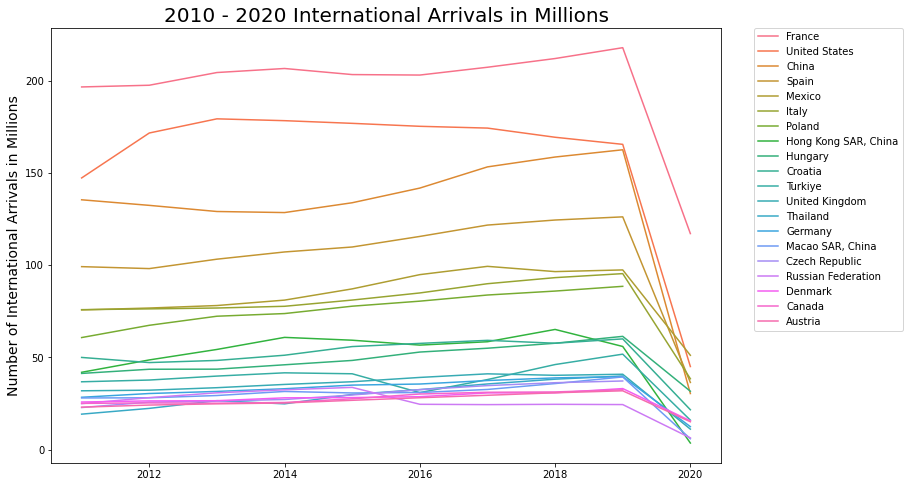

In [ ]:
#Example 1
def linechart(num_country):

    Q_sorted_country = list(tourism.groupby(['CountryName'])['CountryName','Value'].mean().sort_values('Value',ascending = False).index)[:num_country] #list of top countries sorted by 10 years average arrival counts , descending 
    Q_tourism_linechart = tourism[tourism['CountryName'].isin(Q_sorted_country)]

    fig,ax = plt.subplots(figsize = (12,8))
    ax = sns.lineplot(x = 'Year', y = 'Value', data = Q_tourism_linechart, hue = 'CountryName')
    ax.set_title('2010 - 2020 International Arrivals in Millions',size = 20)
    ax.set_ylabel('Number of International Arrivals in Millions',size = 14)
    ax.set_xlabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

    return None

# show the top 20 most visited countries 
linechart(20)

In [ ]:
# Example 2 - Choropleth map
#import the shapefile for geopandas 
shapefile = '/content/drive/MyDrive/milestoneexam/countries_110m/ne_110m_admin_0_countries.shp' 
#DataSource: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

#Read shapefile using Geopandas and it returns a GeoDataFrame object 
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

In [ ]:
# print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica' as it takes up a large space in the map and not needed in our analysis
gdf = gdf.drop(gdf.index[159])

In [ ]:
def tourism_map_per_year(year):
    tourism_df = tourism[tourism['Year'] == year]
    # The merged file is a GeoDataframe object that can be rendered using geopandas module.
    tourism_gdf_merged = gdf.merge(tourism_df, left_on = 'country_code', right_on = 'CountryCode')
    #Read data to json.
    tourism_merged_json = json.loads(tourism_gdf_merged.to_json())
    #Convert to String like object.
    tourism_json_data = json.dumps(tourism_merged_json)
    #Input GeoJSON source that contains features for plotting.
    tourism_geosource = GeoJSONDataSource(geojson = tourism_json_data)
    

    #Define color palette, color mapper and tick labels
    palette = brewer['YlGnBu'][5]
    palette = palette[::-1]
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 250)
    tick_labels = {'0': '0', '50': '50', '100':'100', '150':'150', '200':'200','250':'250'}
    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
    border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
    #Add hover tool
    hover = HoverTool(tooltips = [ ('Country/region','@country'),('International Arrivals', '@Value{int}')])
    
    
    #Create figure object.
    output_notebook()
    p = figure(title = f'International tourism, number of arrivals in {year} (in millions)', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
    p.left[0].formatter.use_scientific = False

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.patches('xs','ys', source = tourism_geosource,fill_color = {'field' :'Value', 'transform' : color_mapper},
              line_color = 'black', line_width = 0.25, fill_alpha = 1)
    p.title.text_font_size = '16pt'
    p.axis.visible = False
    p.add_layout(color_bar, 'below')

    show(p)

    return None

tourism_map_per_year(2020)


In [ ]:
tourism_map_per_year(2019)

# Data Visualization 

*Discuss the role of data visualization in data exploration and analysis. Be prepared to share and describe at a minimum one basic and one advanced visual exploration technique that you applied to the World Bank’s WDI data set. Explain how each visualization is encoded, how it is to be interpreted, and evaluate each in terms of its expressiveness and effectiveness if it was to be shared with a general audience. You should plan to experiment with a variety of visualization techniques as part of your preparation for this question.*




1.   The importance of data visualization 
2.   How is the line chart encoded, how to interprete, how effective and expressive it is
3.   How is the world map vis encoded, how to interprete, how effective and expressive it is
4.   Compare the bar chart vs world map, and world map using matplotlib vs bokeh. 





### International Arrivals Line Chart

In [ ]:
def sort_country(num=20):
    sorted_country = list(tourism.groupby(['CountryName'])['CountryName','Value'].mean().sort_values('Value',ascending = False).index)[:num] #list of top countries sorted by 10 years average arrival counts , descending 
    return sorted_country

sorted_country = sort_country(num=5)

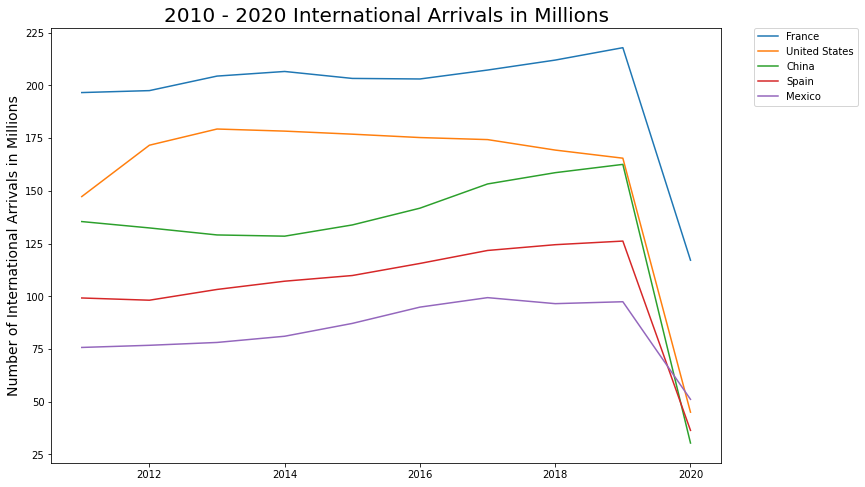

In [ ]:
tourism_linechart = tourism[tourism['CountryName'].isin(sorted_country)]
fig,ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(x = 'Year', y = 'Value', data = tourism_linechart, hue = 'CountryName')
ax.set_title('2010 - 2020 International Arrivals in Millions',size = 20)
ax.set_ylabel('Number of International Arrivals in Millions',size = 14)
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### International Tourism Receipts Line Chart 

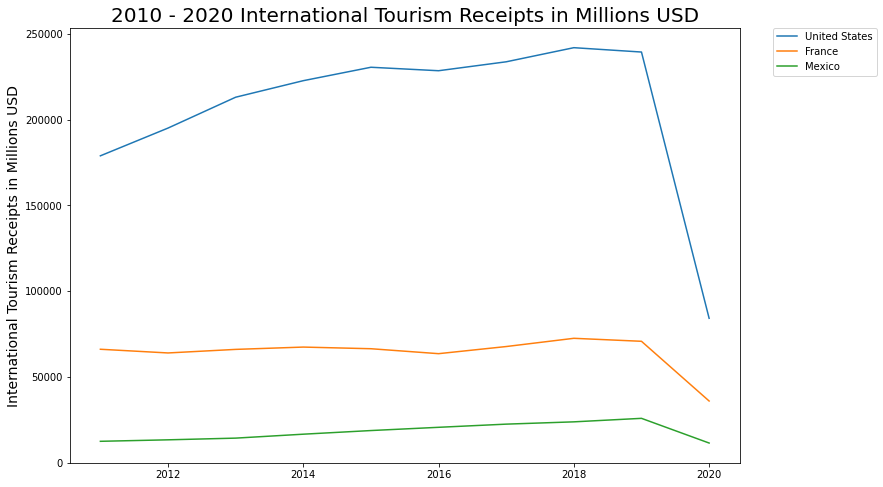

In [ ]:
receipts_linechart = tourism_receipts[tourism_receipts['CountryName'].isin(sorted_country)]
fig,ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(x = 'Year', y = 'Value', data = receipts_linechart, hue = 'CountryName')
ax.set_title('2010 - 2020 International Tourism Receipts in Millions USD',size = 20)
ax.set_ylabel('International Tourism Receipts in Millions USD',size = 14)
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### World Choropleth Map Visualization

In [ ]:
# print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica' as it takes up a large space in the map and not needed in our analysis
gdf = gdf.drop(gdf.index[159])

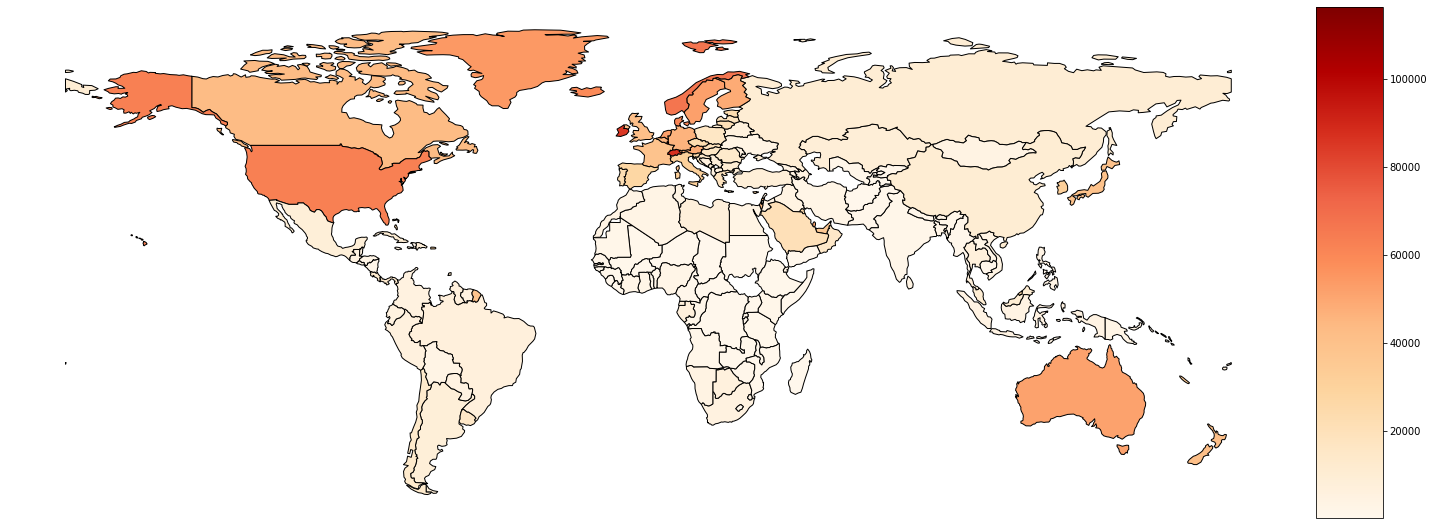

In [ ]:
GDP_2020 = GDP[GDP['Year'] == 2020]
# The merged file is a GeoDataframe object that can be rendered using geopandas module.
gdf_merged = gdf.merge(GDP_2020, left_on = 'country_code', right_on = 'CountryCode')

fig,ax = plt.subplots(figsize = (25,25))

#to vertically align the plot axes and the legend axes: 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

#plot the map
gdf_merged.plot(column= 'Value',ax=ax,legend=True,cax = cax,cmap='OrRd',edgecolor='black',missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })
ax.set_axis_off()
plt.show()


#### Interactivity using Bokeh library

In [ ]:
def GDP_map_per_year(year):
    GDP_df = GDP[GDP['Year'] == year]
    # The merged file is a GeoDataframe object that can be rendered using geopandas module.
    gdf_merged = gdf.merge(GDP_df, left_on = 'country_code', right_on = 'CountryCode')
    #Read data to json.
    merged_json = json.loads(gdf_merged.to_json())
    #Convert to String like object.
    json_data = json.dumps(merged_json)
    
    #Input GeoJSON source that contains features for plotting.
    geosource = GeoJSONDataSource(geojson = json_data)
    #Define a color palette
    palette = brewer['YlGnBu'][6]
    palette = palette[::-1]

    #Using LinearColorMapper to linearly maps a range of numbers into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 120000)
    #Color bar tick label 
    tick_labels = {'20000': '20000', '40000': '40000', '60000':'60000', '80000':'80000', '100000':'100000','120000':'120000'}
    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
    border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
    #Add hover tool
    hover = HoverTool(tooltips = [ ('Country/region','@country'),('GDP per capita in USD', '@Value{int}')])

    #Create figure object.
    output_notebook()
    p = figure(title = f'GDP per Capita in USD {year}', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
    p.left[0].formatter.use_scientific = False

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.patches('xs','ys', source = geosource,fill_color = {'field' :'Value', 'transform' : color_mapper},
              line_color = 'black', line_width = 0.25, fill_alpha = 1)
    p.title.text_font_size = '16pt'
    p.axis.visible = False
    p.add_layout(color_bar, 'below')

    show(p)


    return None

GDP_map_per_year(2012)


# Data Analysis: Correlation 

### Correlation Example Calculation and Visualization

In [ ]:
def corr_2_indicator(df1,df2,year):
    df1 = df1[df1['Year'] == year]
    df2 = df2[df2['Year'] == year]
    merge_df = df1.merge(df2, on = 'CountryCode')
    merge_df = merge_df[['CountryName_x','Value_x','Value_y']]
    return merge_df.corr()['Value_y'][0]

for year in range(2011,2021):
    print(f'For {year}, the correlation coefficient between GDP per capita in USD and International arrivals is {corr_2_indicator(tourism, GDP, year)}')




For 2011, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15422370803014634
For 2012, the correlation coefficient between GDP per capita in USD and International arrivals is 0.1563040605257511
For 2013, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15052212223161066
For 2014, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15389514177491354
For 2015, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15642935266814906
For 2016, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15462968610866235
For 2017, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15263618835422002
For 2018, the correlation coefficient between GDP per capita in USD and International arrivals is 0.15103132931668456
For 2019, the correlation coefficient between GDP per cap

We can see that there is a constant weak positive correlation between international arrivals and GDP per capita, based on our data for the past ten years

In [ ]:
#it’s useful to also create a scatterplot so that you can identify any outliers in the dataset along with a potential nonlinear relationship.

In [ ]:
# creating X-Y Plots With a Regression Line
def tourism_GDP_corr(year):
    df1 = tourism[tourism['Year'] == year]
    df2 = GDP[GDP['Year'] == year]
    merge_tour_GDP = df1.merge(df2, on = 'CountryCode', suffixes=('_tour', '_GDP'))
    merge_tour_GDP = merge_tour_GDP[['CountryName_tour','Value_tour','Value_GDP']]

    # slope, intersept, and correlation coefficient calculation 
    slope, intercept, r, p, stderr = stats.linregress(merge_tour_GDP['Value_tour'], merge_tour_GDP['Value_GDP'])

    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

    # plotting
    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(merge_tour_GDP['Value_tour'], merge_tour_GDP['Value_GDP'], linewidth=0, marker='s', label='Data points')
    ax.plot(merge_tour_GDP['Value_tour'], intercept + slope * merge_tour_GDP['Value_tour'], label=line)
    ax.set_xlabel('International Tourism, Number of Arrivals (in millions)')
    ax.set_ylabel('GDP per capita (USD)')
    plt.title(f'The Correlation of GDP per Capita and Number of International Arrivals of {year}')
    ax.legend(facecolor='white')
    plt.show()

tourism_GDP_corr(2020)

In [ ]:
def heatmap_corr(year):
    df1 = tourism[tourism['Year'] == year]
    df2 = GDP[GDP['Year'] == year]
    merge_tour_GDP = df1.merge(df2, on = 'CountryCode', suffixes=('_tour', '_GDP'))
    merge_tour_GDP = merge_tour_GDP[['CountryName_tour','Value_tour','Value_GDP']]

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.heatmap(merge_tour_GDP.corr(),cmap=plt.get_cmap('Greens'),annot=True, ax = ax)
    plt.title(f"Correlation matrix between GDP per capita in USD and International arrivals of {year}")
    plt.show()
    return None
heatmap_corr(2020)

In [ ]:
for year in range(2011,2021):
    print(f'For {year}, the correlation coefficient between international arrivals and International tourism receipts is {corr_2_indicator(tourism, tourism_receipts, year)}')


In [ ]:
def tourism_receipts_corr(year):

    df1 = tourism[tourism['Year'] == year]
    df2 = tourism_receipts[tourism_receipts['Year'] == year]
    merge_tour_receipts = df1.merge(df2, on = 'CountryCode', suffixes=('_tour', '_receipts'))
    merge_tour_receipts = merge_tour_receipts[['CountryName_tour','Value_tour','Value_receipts']]

    # creating X-Y Plots With a Regression Line
    corr_2_indicator(tourism, tourism_receipts, year)
    # slope, intersept, and correlation coefficient calculation 
    slope, intercept, r, p, stderr = stats.linregress(merge_tour_receipts['Value_tour'], merge_tour_receipts['Value_receipts'])

    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

    # plotting
    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(merge_tour_receipts['Value_tour'], merge_tour_receipts['Value_receipts'], linewidth=0, marker='s', label='Data points')
    ax.plot(merge_tour_receipts['Value_tour'], intercept + slope * merge_tour_receipts['Value_tour'], label=line)
    ax.set_xlabel('International Arrivals (in millions)')
    ax.set_ylabel('International Travel Receipts (in millions, USD)')
    ax.legend(facecolor='white')
    plt.title(f'The Correlation between Intl Tourism Receipts and Number of Arrivals of {year}')
    plt.show()

    return None

tourism_receipts_corr(2019) 


In [ ]:
tourism_receipts_corr(2020) 

This is aligned with our common thoughts that there is a strong positive correlation between the tourism receipts and number of arrivals. 

# Reference

https://datatopics.worldbank.org/world-development-indicators/

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0